[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/2_ex_descriptive_analytics.ipynb) 

# BADS Exercise 2 on the foundations of descriptive analytics
The second exercise comprises one more task to advance your skills in Python programming. It's main focus is on cluster analysis.

## 1. Further exercises on Python programming
The following exercise tasks revisit some concepts covered in [Tutorial 1 on Python programming](https://github.com/Humboldt-WI/bads/blob/master/tutorials/1_nb_python_intro.ipynb) 

### Using inbuilt functions and libraries
In Python and other programming language, we use inbuilt functions all the time. Libraries like `NumPy` and `Pandas`, which offer a ton of functionality for handling and analyzing data, are the main reason why the Python language is such a good fit for data science. Let's practice our ability to access libraries and use their functions with some concrete tasks.

The density of the normal distribution with mean $\mu$ and variance $\sigma$ is given as
$$f(x | \mu ,\sigma ^{2}) = {\frac {1}{\sqrt {2\sigma ^{2}\pi}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

Let's create a nice plot of the bell curve that is so famous and characteristic for the normal distribution. Below, we already made sure that relevant libraries are imported. First, define two variables that store the two parameters of the normal distribution; no need to spill out these parameters, right? Next generate some values $x$. Say you want to plot the bell curve for $x \in \{-3, 3\} $. Use the `NumPy` function `linspace()` for this purpose. 

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

miu = 0
sigma = 1
n = 100

#help(np.linspace)
x = np.linspace(-3,3,num=100)



Then, for each value of $x$, compute the probability that a normally distributed random variable would be arbitrarily close to that value. To calculate the probability density of the normal distribution, you can use the function `norm.pdf`. The function is part of the *stats models library*, which we import below. So you can write something like `stats.norm.pdf(...)` where ... stands for the arguments that the function requires. Make sure to store the results of the computation in a variable **nvValues**.

In [84]:
#help(stats.norm.pdf)
nvValues = stats.norm.pdf(x,loc = miu, scale = sigma)

######- scale: standard deviation of the distribution########

#nvValues

We are now ready to plot. Create a simple graph of **nvValues** against **x** using the `plot()`function. Let's say you want your line to be in red color. Use the help and web search to find out how to plot a red line. Also make sure to label your axes; remember: never create a plot without axis labels.

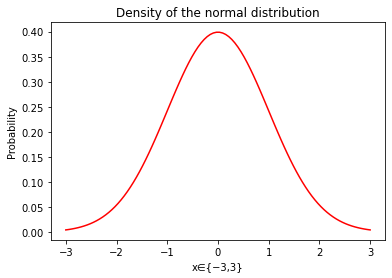

In [85]:
#help(plt.plot)

plt.plot(x,nvValues,color='red')
plt.title('Density of the normal distribution')
plt.xlabel('x∈{−3,3}')
plt.ylabel('Probability')
plt.show()


## 2. Exercises on descriptive analytics
The following exercise tasks revisit some concepts covered in [Tutorial 2 on descriptive analytics](https://github.com/Humboldt-WI/bads/blob/master/tutorials/2_nb_descriptive_analytics.ipynb). 

### 2.1 Data generation
We want to revisit kMeans and need some data for this purpose. Make use of the function `make_blobs()`, which is part of the `sklearn` library to generate some artificial data. Say we want to **create data with 4 clusters**. Make sure to configure the `make_blobs()` function appropriately. 

In [163]:
# Generate data for clustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

np.random.seed(88)

n = 500 # no. samples
centers = [(0, 0), (5, 5), (0, 4), (4, 0)]  # centers of the two Gaussian
std = 0.75  # standard deviaton

# Call the function and obtain your data
X,y,c = make_blobs(n_samples=n, centers=centers, cluster_std=std,return_centers=True)

#make_blobs(n_samples=n, centers=centers, cluster_std=std,return_centers=True)

#X.shape, y.shape, c.shape # ensure shape is as expected
#y[:50]
#c

(array([[ 5.36253157e+00,  3.64777596e+00],
        [ 3.66660538e+00,  7.08759976e-01],
        [ 4.08171644e+00,  1.11673200e+00],
        [ 9.12164033e-01,  6.53776484e-01],
        [-4.01966598e-01, -1.00383908e-01],
        [ 4.13937222e+00,  5.18277565e+00],
        [ 3.07332672e-01, -1.40974319e+00],
        [ 1.28591941e-01,  1.33744227e+00],
        [ 5.57594351e+00,  4.10329485e+00],
        [ 4.15080961e+00,  1.16601593e+00],
        [-9.91330957e-02, -1.12013094e-01],
        [ 1.72734690e-01,  3.33468823e+00],
        [-3.55981226e-01,  4.43207697e+00],
        [ 4.28291783e+00,  3.22718299e-01],
        [ 9.81144657e-02,  4.29814697e+00],
        [ 6.14822613e+00,  6.41462188e+00],
        [ 4.70177266e-01, -1.75875404e+00],
        [-2.89134536e-01, -2.54778925e-01],
        [-2.59083994e-01,  3.81183478e+00],
        [ 5.39802942e+00,  5.56960693e+00],
        [ 4.18119955e+00,  4.75725667e+00],
        [-3.01719881e-01,  8.78405329e-01],
        [ 5.36389450e+00,  5.611

## 2.2 kMeans
The second tutorial provided a *from scratch implementation* of the kMeans algorithm. Go back to the tutorial and copy/paste the relevant parts of the code into this notebook. This will allow you to run the algorithm here.

In [102]:
# From-scratch implementation of kMeans 

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2)) # other distance measures also possible

def label_cluster(n_samples, clusters):
    """each sample will get the label of the cluster it was assigned to"""
    labels = np.empty(n_samples) # creates empty array as long as samples for future labels

    for cluster_idx, cluster in enumerate(clusters):
        for sample_index in cluster:
            labels[sample_index] = cluster_idx # assign labels to each sample
    return labels

def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroids to create clusters"""
    clusters = [[] for _ in range(K)] # creates a list of K number of lists
    for idx, sample in enumerate(X):
        centroid_idx = find_closest_centroid(sample, centroids) # find closest centroid for each sample
        clusters[centroid_idx].append(idx) # create index list of closest centroids
    return clusters

def find_closest_centroid(sample, centroids):
    """Distance from each sample to every centroid"""
    distances = [euclidean_distance(sample, point) for point in centroids] # calculate distance from each sample to each centroid
    closest_index = np.argmin(distances) # take closest centroid (one with minimal distance)
    return closest_index

def update_centroids(X, K, n_features, clusters):
    """Assign mean value of cluster features to each centroid"""
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster,:], axis=0) # find new centroid by finding mean of all points assigned to centroid
        centroids[cluster_idx] = cluster_mean # collect all centroids
    return centroids

def is_converged(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(K)] # check distance between old and new centroids
    return sum(distances) == 0 # return Boolean indicating whether centroids are the same as before or not

def KMeans_from_scratch(X, K, max_iters):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape
    
    # Initialization 
    random_sample_idx = np.random.choice(n_samples, K, replace=False) # take random sample points to be initial clusters
    centroids = [X[idx] for idx in random_sample_idx] # label these points as centroids

    iteration_num = 0 # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):
        
        iteration_num += 1 # track iterations required

        clusters = create_clusters(K, X, centroids) # assignment to closest centroids (cluster creation)

        centroids_old = centroids # archive previous centroids
        centroids = update_centroids(X, K, n_features, clusters) # Updating centroids 
        
        # Convergence Confirmation
        if is_converged(centroids_old, centroids, K): # check if last iteration's centroids were the same as current iteration      
            labels = label_cluster(n_samples, clusters)
            dist = [euclidean_distance(X[row_num], centroids[int(labels[row_num])]) for row_num in range(X.shape[0])] # get distance from each point to its centroid
            total_dist = np.sum(np.square(dist)) # total distance calculated as sum of squares
            break # exit loop since there was no change since last iteration
    
    
    # Classify samples as the index of their clusters
    return labels, iteration_num, K, centroids, total_dist

Test the implementation by clustering the data created in 2.1 above. We know the data has 4 clusters, so feel free to set $k=4$. 

In [103]:
# Clustering of the artificial data
result = KMeans_from_scratch(X, K=4, max_iters=100)
#result

print("No. Iterations:", result[1], ", No. Centres:", result[2], ", Total Squared Distance {:.4}".format(result[4]))

print("Centroid Coordinates:", result[3])

print(c)

from collections import Counter
#help(Counter)
print(Counter(result[0]))
print(Counter(y))

No. Iterations: 6 , No. Centres: 4 , Total Squared Distance 547.6
Centroid Coordinates: [[ 0.20032397  4.07864299]
 [ 5.09594921  5.029106  ]
 [ 4.12260974  0.0395516 ]
 [-0.01328649 -0.05110132]]
[[0 0]
 [5 5]
 [0 4]
 [4 0]]
Counter({3.0: 126, 0.0: 125, 1.0: 125, 2.0: 124})
Counter({2: 125, 1: 125, 0: 125, 3: 125})


## 2.3 Distance function
In the lecture, we argued that clustering methods and kMeans are versatile in that the support various distance measures. Let's convince ourself that this is true. Your task is to write a custom function that calculates **cosine similarity**. You can look up the formula of the cosine similarity in the lecture slides of chapter 2, or from the Internet. 

In [104]:
####from the solution
#def cosine_similarity(a, b):
#    '''Computes the Cosine similarity between two numpy arrays'''
#    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
########

def cosine_sim(x,y):
    num = x.dot(y.T)
    denom = np.linalg.norm(x) * np.linalg.norm(y)
    return num / denom

#test of difference between the standard solution and mine
a = np.array([1, 0.1])
b = np.array([1, 0.5])
print(a.dot(b.T))
print(np.dot(a,b))

1.05
1.05


In [105]:
#the following is from the solution

# test our function
a = np.array([1, 0.1])
b = np.array([1, 0.5])
print(cosine_sim(a, b)) # should be low because arrays have a similar angle 
b = np.array([1, 10])
print(cosine_sim(a, b)) # should be high becase arrays have a different angle

# let's compare the output of our function to the scipy implementation of the cosine 
# distance available at https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
from scipy.spatial import distance
print(distance.cosine(a, b))

# Note that `cosine_similarity()` computes cosine similarity, whereas `distance.cosine()` 
# computes distance as 1 - similarity. This is done to make sure that lower values of the 
# distance metric refer to a smaller distance. The latter option is more convinent in our
# KMeans implementation. Therefore, we will update our custom function to compute Cosine 
# distance between the two arrays. 

0.9344877349289681
0.19801980198019803
0.801980198019802


In [106]:
#the following is from the solution

# define a function that computes cosine distance
def cosine_distance(a, b):
    '''Computes the Cosine distance between two numpy arrays'''
    return 1 - cosine_sim(a, b)

# test function
a = np.array([1, 0.1])
b = np.array([1, 0.5])
cosine_distance(a, b) == distance.cosine(a, b)

True

Next thing to do is to change the above from scratch implementation of the kMeans algorithm such that it uses your cosine similarity function for clustering the data. It might be better to copy/past the full kMeans code one more time because this will allow you to have both versions, with Euclidean distance and cosine similarity, in the notebook. This makes it easier to re-run the clustering in case you need or want to.

In [107]:
# kMeans with cosine similarity

def label_cluster_cos(n_samples, clusters):
    """each sample will get the label of the cluster it was assigned to"""
    labels = np.empty(n_samples) # creates empty array as long as samples for future labels

    for cluster_idx, cluster in enumerate(clusters):
        for sample_index in cluster:
            labels[sample_index] = cluster_idx # assign labels to each sample
    return labels

def create_clusters_cos(K, X, centroids):
    """Assign the samples to the closest centroids to create clusters"""
    clusters = [[] for _ in range(K)] # creates a list of K number of lists
    for idx, sample in enumerate(X):
        centroid_idx = find_closest_centroid_cos(sample, centroids) # find closest centroid for each sample
        clusters[centroid_idx].append(idx) # create index list of closest centroids
    return clusters

def find_closest_centroid_cos(sample, centroids):
    """Distance from each sample to every centroid"""
    distances = [cosine_distance(sample, point) for point in centroids] # calculate distance from each sample to each centroid
    closest_index = np.argmin(distances) # take closest centroid (one with minimal distance)
    return closest_index

def update_centroids_cos(X, K, n_features, clusters):
    """Assign mean value of cluster features to each centroid"""
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster,:], axis=0) # find new centroid by finding mean of all points assigned to centroid
        centroids[cluster_idx] = cluster_mean # collect all centroids
    return centroids

def is_converged_cos(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    distances = [cosine_distance(centroids_old[i], centroids[i]) for i in range(K)] # check distance between old and new centroids
    return sum(distances) == 0 # return Boolean indicating whether centroids are the same as before or not

def KMeans_from_scratch_cos(X, K, max_iters):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape
    
    # Initialization 
    random_sample_idx = np.random.choice(n_samples, K, replace=False) # take random sample points to be initial clusters
    centroids = [X[idx] for idx in random_sample_idx] # label these points as centroids

    iteration_num = 0 # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):
        
        iteration_num += 1 # track iterations required

        clusters = create_clusters_cos(K, X, centroids) # assignment to closest centroids (cluster creation)

        centroids_old = centroids # archive previous centroids
        centroids = update_centroids_cos(X, K, n_features, clusters) # Updating centroids 
        
        # Convergence Confirmation
        if is_converged_cos(centroids_old, centroids, K): # check if last iteration's centroids were the same as current iteration
            break # exit loop since there was no change since last iteration
    
    labels = label_cluster_cos(n_samples, clusters)
    dist = [cosine_distance(X[row_num], centroids[int(labels[row_num])]) for row_num in range(X.shape[0])] # get distance from each point to its centroid
    total_dist = np.sum(np.square(dist)) # total distance calculated as sum of squares
    
    # Classify samples as the index of their clusters
    return labels, iteration_num, K, centroids, total_dist


## 2.4 New clustering solution
The last task on the list is to apply the altered kMeans with cosine similarity to your synthetic data set. Try to come up with a suitable way to compare the results of the two versions of kMeans. It is natural to ask how the cluster solutions differ when using Euclidean distance or cosine similarity. How would you answer that question? Make use of your Python skills to come up with an answer.

In [108]:
# Create cluster solution with the modified kMeans
# Clustering of the artificial data
result_cos = KMeans_from_scratch_cos(X, K=4, max_iters=100)

#result

In [109]:
# Write some code to compare the two cluster solutions from using Euclidean distance and cosine similarity 

print("No. Iterations using Euclidean distance:", result[1], ", No. Iterations using Cosine distance:", result_cos[1])

No. Iterations using Euclidean distance: 6 , No. Iterations using Cosine distance: 100


In [110]:
print("No. Centres using Euclidean distance:", result[2],", No. Centres using Cosine distance:",result_cos[2])

No. Centres using Euclidean distance: 4 , No. Centres using Cosine distance: 4


In [111]:
print("Total Squared Distance using Euclidean distance{:.4}".format(result[4]), ", Total Squared Distance using Cosine distance{:.4}"
      .format(result_cos[4]))


Total Squared Distance using Euclidean distance547.6 , Total Squared Distance using Cosine distance8.085


In [112]:
#the following is from the solution

# Second, let's compare cluster centroids from the two KMeans implementations. 
# Note that the order of clusters can be different dpeneding on the initialization 
# points. Comparing the closest clusters from the two algorithms. we can see that
# the correspndning centroids are not too far from their counterparts identified 
# by a different KMeans implementation. Still, there are differences in the values. 
# To judje the significance of these differences, it is best to visualize the clustering 
# solutions. This is what we do in the cell below.

print('Centroid Coordinates: Euclidian Distance')
print(np.round(result[3], 4))
print('')
print('Centroid Coordinates: Cosine Distance')
print(np.round(result_cos[3], 4))
print('')
print('Original Centroid Coordinates')
print(c)

Centroid Coordinates: Euclidian Distance
[[ 0.2003  4.0786]
 [ 5.0959  5.0291]
 [ 4.1226  0.0396]
 [-0.0133 -0.0511]]

Centroid Coordinates: Cosine Distance
[[-0.5557 -0.4102]
 [ 0.1111  3.4698]
 [ 3.4225 -0.1042]
 [ 4.5435  4.4551]]

Original Centroid Coordinates
[[0 0]
 [5 5]
 [0 4]
 [4 0]]


In [115]:
print("Count the number of cases in which a data point from cluster 0 ended up in cluster 1 and vice versa.")
print('')
print("Euclidian Distance:",Counter(result[0][y == 0]),
    Counter(result[0][y == 1]),Counter(result[0][y == 2]),
    Counter(result[0][y == 3]))
print('')
print("Cosine Distance:",Counter(result_cos[0][y == 0]),
    Counter(result_cos[0][y == 1]),Counter(result_cos[0][y == 2]),
    Counter(result_cos[0][y == 3]))


##note that this maybe unvalid, for there are more than 2 clusters

Count the number of cases in which a data point from cluster 0 ended up in cluster 1 and vice versa.

Euclidian Distance: Counter({3.0: 125}) Counter({1.0: 125}) Counter({0.0: 125}) Counter({2.0: 124, 3.0: 1})

Cosine Distance: Counter({0.0: 50, 2.0: 31, 1.0: 28, 3.0: 16}) Counter({3.0: 125}) Counter({1.0: 124, 3.0: 1}) Counter({2.0: 122, 3.0: 3})


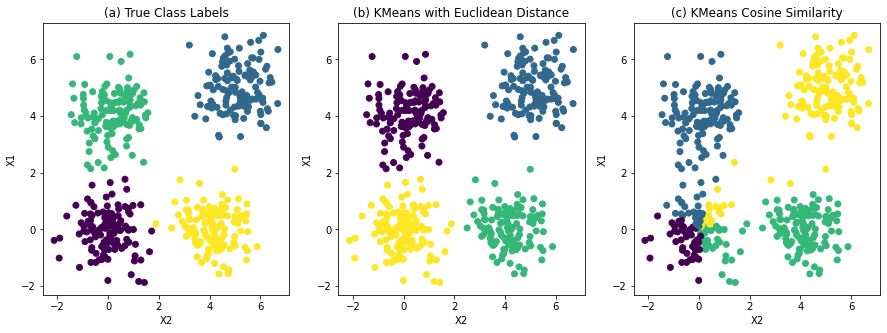

In [140]:
# Let's visualize different clustering solutions as well as the true class labels
# of the generated blobs. We will use `plt.subplot(xyz)` to create scatterplots:
# - x: number of rows in the figure
# - y: number of columns in the figure
# - z: index of the subplot

# The plot reveals an interesitng result. KMeans with Euclidean distance works well
# at distinguishing the four blobs that we generated. It makes a few errors for the
# clusters in the lower-left half of the feature space, where some points from the 
# blobs intersect with each other, but the overall agreement is high. On the other 
# hand, using cosine similarity leads to a slightly different clustering solution. 
# This happens because cosine distance depends on the angle between the points. 
# Looking at the right subplot, you can notice that you can separate clusters one 
# from another if you draw imaginary lines starting from the point with the coordinates 
# [0, 0]. This is a different logic compared to Euclidean distance, which is more 
# suitable in our setting.

plt.figure(figsize = [15, 5])

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("(a) True Class Labels")
plt.ylabel("X1")
plt.xlabel("X2")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c = result[0])
plt.title("(b) KMeans with Euclidean Distance")
plt.ylabel("X1")
plt.xlabel("X2")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c = result_cos[0])
plt.title("(c) KMeans Cosine Similarity")
plt.ylabel("X1")
plt.xlabel("X2")

plt.show()

## 2.5 Further tasks
Still not enough? Ok, that is great! Here are a few ideas for some more tasks associated with kMeans and the scope of this exercise.
- Write a custom function calculating the city-block or Manhatten metric
- Improve the from scratch implementation of kMeans such that it supports the caller to specify the desired distance function as an argument
- The above changes should enable you to flexibly run kMeans with Euclidean, cosine, and city-block distance. Try that out using your synthetic data
- Use the `sklearn` function `make_classification()` to generate a more challenging data and apply kMeans to it. You can use your customer implementation of kMeans or the one available in `sklearn`
- Run a web-search for the **IRIS data set**. It is a very well known data set. Quickly familiarize yourself with the data. Afterwards, load it using the function `sklearn.datasets.load_iris()`. Check whether kMeans is able to identify the three types of iris flowers. 

In [128]:
Manhatten_distance = lambda x, y: abs(x[0]-y[0])+abs(x[1]-y[1])

In [129]:
##test

a = np.array([1, 2])
b = np.array([3, 5])
Manhatten_distance(a,b)

5

In [130]:
# kMeans with cosine similarity

def label_cluster_man(n_samples, clusters):
    """each sample will get the label of the cluster it was assigned to"""
    labels = np.empty(n_samples) # creates empty array as long as samples for future labels

    for cluster_idx, cluster in enumerate(clusters):
        for sample_index in cluster:
            labels[sample_index] = cluster_idx # assign labels to each sample
    return labels

def create_clusters_man(K, X, centroids):
    """Assign the samples to the closest centroids to create clusters"""
    clusters = [[] for _ in range(K)] # creates a list of K number of lists
    for idx, sample in enumerate(X):
        centroid_idx = find_closest_centroid_man(sample, centroids) # find closest centroid for each sample
        clusters[centroid_idx].append(idx) # create index list of closest centroids
    return clusters

def find_closest_centroid_man(sample, centroids):
    """Distance from each sample to every centroid"""
    distances = [Manhatten_distance(sample, point) for point in centroids] # calculate distance from each sample to each centroid
    closest_index = np.argmin(distances) # take closest centroid (one with minimal distance)
    return closest_index

def update_centroids_man(X, K, n_features, clusters):
    """Assign mean value of cluster features to each centroid"""
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster,:], axis=0) # find new centroid by finding mean of all points assigned to centroid
        centroids[cluster_idx] = cluster_mean # collect all centroids
    return centroids

def is_converged_man(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    distances = [Manhatten_distance(centroids_old[i], centroids[i]) for i in range(K)] # check distance between old and new centroids
    return sum(distances) == 0 # return Boolean indicating whether centroids are the same as before or not

def KMeans_from_scratch_man(X, K, max_iters):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape
    
    # Initialization 
    random_sample_idx = np.random.choice(n_samples, K, replace=False) # take random sample points to be initial clusters
    centroids = [X[idx] for idx in random_sample_idx] # label these points as centroids

    iteration_num = 0 # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):
        
        iteration_num += 1 # track iterations required

        clusters = create_clusters_man(K, X, centroids) # assignment to closest centroids (cluster creation)

        centroids_old = centroids # archive previous centroids
        centroids = update_centroids_man(X, K, n_features, clusters) # Updating centroids 
        
        # Convergence Confirmation
        if is_converged_man(centroids_old, centroids, K): # check if last iteration's centroids were the same as current iteration
            break # exit loop since there was no change since last iteration
    
    labels = label_cluster_man(n_samples, clusters)
    dist = [Manhatten_distance(X[row_num], centroids[int(labels[row_num])]) for row_num in range(X.shape[0])] # get distance from each point to its centroid
    total_dist = np.sum(np.square(dist)) # total distance calculated as sum of squares
    
    # Classify samples as the index of their clusters
    return labels, iteration_num, K, centroids, total_dist

In [134]:
# Create cluster solution with the modified kMeans
# Clustering of the artificial data
result_man = KMeans_from_scratch_man(X, K=4, max_iters=100)

print("No. Iterations using Euclidean distance:", result[1], 
      ", No. Iterations using Cosine distance:", result_cos[1],
      ", No. Iterations using Manhatten distance:", result_man[1])


No. Iterations using Euclidean distance: 6 , No. Iterations using Cosine distance: 100 , No. Iterations using Manhatten distance: 6


In [135]:
print("Total Squared Distance using Euclidean distance{:.4} ".format(result[4]),
      ", Total Squared Distance using Cosine distance{:.4} " .format(result_cos[4]),
      ", Total Squared Distance using Manhatten distance{:.4} " .format(result_man[4]))

Total Squared Distance using Euclidean distance547.6  , Total Squared Distance using Cosine distance8.085  , Total Squared Distance using Manhatten distance912.2 


In [136]:
print('Centroid Coordinates: Euclidian Distance')
print(np.round(result[3], 4))
print('')
print('Centroid Coordinates: Cosine Distance')
print(np.round(result_cos[3], 4))
print('')
print('Centroid Coordinates: Manhatten Distance')
print(np.round(result_man[3], 4))
print('')
print('Original Centroid Coordinates')
print(c)

Centroid Coordinates: Euclidian Distance
[[ 0.2003  4.0786]
 [ 5.0959  5.0291]
 [ 4.1226  0.0396]
 [-0.0133 -0.0511]]

Centroid Coordinates: Cosine Distance
[[-0.5557 -0.4102]
 [ 0.1111  3.4698]
 [ 3.4225 -0.1042]
 [ 4.5435  4.4551]]

Centroid Coordinates: Manhatten Distance
[[ 5.0959  5.0291]
 [ 4.1226  0.0396]
 [-0.0133 -0.0511]
 [ 0.2003  4.0786]]

Original Centroid Coordinates
[[0 0]
 [5 5]
 [0 4]
 [4 0]]


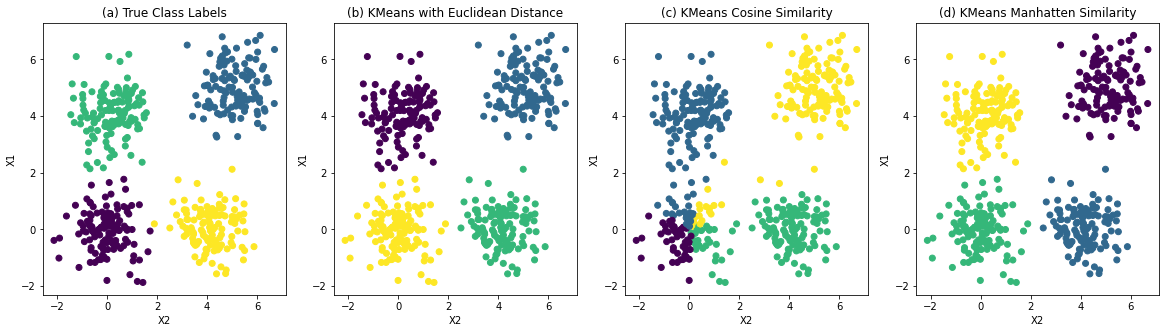

In [146]:
plt.figure(figsize = [20, 5])

plt.subplot(141)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("(a) True Class Labels")
plt.ylabel("X1")
plt.xlabel("X2")

plt.subplot(142)
plt.scatter(X[:, 0], X[:, 1], c = result[0])
plt.title("(b) KMeans with Euclidean Distance")
plt.ylabel("X1")
plt.xlabel("X2")

plt.subplot(143)
plt.scatter(X[:, 0], X[:, 1], c = result_cos[0])
plt.title("(c) KMeans Cosine Similarity")
plt.ylabel("X1")
plt.xlabel("X2")

plt.subplot(144)
plt.scatter(X[:, 0], X[:, 1], c = result_man[0])
plt.title("(d) KMeans Manhatten Similarity")
plt.ylabel("X1")
plt.xlabel("X2")

plt.show()

# Looks like Manhatten distance and Euclidean distance arrive at the same
# solution. This contrasts with the KMeans that uses cosine distance.

In [145]:
def Distance_function(x,a,b):
    if x == "Euclidean":
        dist = np.sqrt(np.sum((a - b)**2))
    elif x == "Cosine":
        num = a.dot(b.T)
        denom = np.linalg.norm(a) * np.linalg.norm(b)
        dist = 1 - num / denom
    elif x == "Manhatten":
        dist = abs(a[0]-b[0])+abs(a[1]-b[1])
    else:
        print("Please add a new function")
    return dist


def label_cluster_improve(n_samples, clusters):
    """each sample will get the label of the cluster it was assigned to"""
    labels = np.empty(n_samples) # creates empty array as long as samples for future labels

    for cluster_idx, cluster in enumerate(clusters):
        for sample_index in cluster:
            labels[sample_index] = cluster_idx # assign labels to each sample
    return labels

def create_clusters_improve(Dist, K, X, centroids):
    """Assign the samples to the closest centroids to create clusters"""
    clusters = [[] for _ in range(K)] # creates a list of K number of lists
    for idx, sample in enumerate(X):
        centroid_idx = find_closest_centroid_improve(Dist, sample, centroids) # find closest centroid for each sample
        clusters[centroid_idx].append(idx) # create index list of closest centroids
    return clusters

def find_closest_centroid_improve(Dist, sample, centroids):
    """Distance from each sample to every centroid"""
    distances = [Distance_function(Dist, sample, point) for point in centroids] # calculate distance from each sample to each centroid
    closest_index = np.argmin(distances) # take closest centroid (one with minimal distance)
    return closest_index

def update_centroids_improve(X, K, n_features, clusters):
    """Assign mean value of cluster features to each centroid"""
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster,:], axis=0) # find new centroid by finding mean of all points assigned to centroid
        centroids[cluster_idx] = cluster_mean # collect all centroids
    return centroids

def is_converged_improve(Dist, centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    distances = [Distance_function(Dist, centroids_old[i], centroids[i]) for i in range(K)] # check distance between old and new centroids
    return sum(distances) == 0 # return Boolean indicating whether centroids are the same as before or not

def KMeans_from_scratch_improve(Dist, X, K, max_iters):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape
    
    # Initialization 
    random_sample_idx = np.random.choice(n_samples, K, replace=False) # take random sample points to be initial clusters
    centroids = [X[idx] for idx in random_sample_idx] # label these points as centroids

    iteration_num = 0 # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):
        
        iteration_num += 1 # track iterations required

        clusters = create_clusters_improve(Dist, K, X, centroids) # assignment to closest centroids (cluster creation)

        centroids_old = centroids # archive previous centroids
        centroids = update_centroids_improve(X, K, n_features, clusters) # Updating centroids 
        
        # Convergence Confirmation
        if is_converged_improve(Dist, centroids_old, centroids, K): # check if last iteration's centroids were the same as current iteration
            break # exit loop since there was no change since last iteration
    
    labels = label_cluster_improve(n_samples, clusters)
    dist = [Distance_function(Dist, X[row_num], centroids[int(labels[row_num])]) for row_num in range(X.shape[0])] # get distance from each point to its centroid
    total_dist = np.sum(np.square(dist)) # total distance calculated as sum of squares
    
    # Classify samples as the index of their clusters
    return labels, iteration_num, K, centroids, total_dist

In [148]:
re_E = KMeans_from_scratch_improve("Euclidean", X, K=4, max_iters=100)
re_C = KMeans_from_scratch_improve("Cosine", X, K=4, max_iters=100)
re_M = KMeans_from_scratch_improve("Manhatten", X, K=4, max_iters=100)

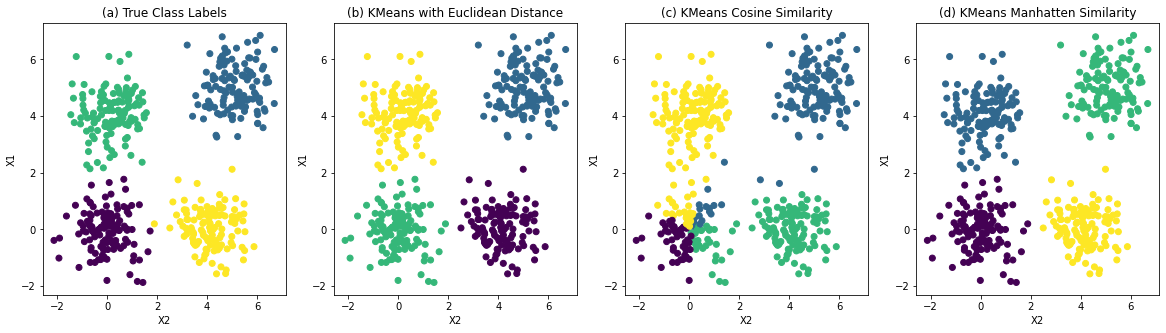

In [149]:
plt.figure(figsize = [20, 5])

plt.subplot(141)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("(a) True Class Labels")
plt.ylabel("X1")
plt.xlabel("X2")

plt.subplot(142)
plt.scatter(X[:, 0], X[:, 1], c = re_E[0])
plt.title("(b) KMeans with Euclidean Distance")
plt.ylabel("X1")
plt.xlabel("X2")

plt.subplot(143)
plt.scatter(X[:, 0], X[:, 1], c = re_C[0])
plt.title("(c) KMeans Cosine Similarity")
plt.ylabel("X1")
plt.xlabel("X2")

plt.subplot(144)
plt.scatter(X[:, 0], X[:, 1], c = re_M[0])
plt.title("(d) KMeans Manhatten Similarity")
plt.ylabel("X1")
plt.xlabel("X2")

plt.show()

In [157]:
#Use the sklearn function make_classification() to generate a more
#challenging data and apply kMeans to it. You can use your customer
#implementation of kMeans or the one available in sklearn

from sklearn.datasets import make_classification

#help(sklearn.datasets.make_classification)

X, y = make_classification(n_samples            = 1000,
                           n_classes            = 3,
                           n_features           = 2, 
                           n_redundant          = 0, 
                           n_informative        = 2,
                           random_state         = 888, 
                           n_clusters_per_class = 1)


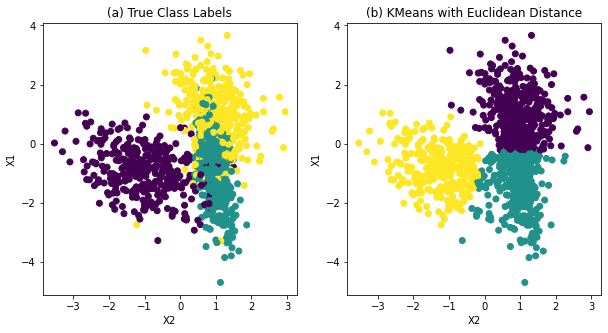

In [159]:
re_new = KMeans_from_scratch_improve("Euclidean", X, K=3, max_iters=100)

plt.figure(figsize = [10, 5])

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("(a) True Class Labels")
plt.ylabel("X1")
plt.xlabel("X2")

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c = re_new[0])
plt.title("(b) KMeans with Euclidean Distance")
plt.ylabel("X1")
plt.xlabel("X2")

plt.show()

In [160]:
#Run a web-search for the IRIS data set. It is a very well known data set.
#Quickly familiarize yourself with the data. Afterwards, load it using 
#the function sklearn.datasets.load_iris(). Check whether kMeans is able 
#to identify the three types of iris flowers.

from sklearn.datasets import load_iris

data = load_iris()


In [161]:
# check target names: there are three flower types
# there are also 4 features describing the flower dimensions
print(data.target_names)
print(data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [165]:
#construct X and y
X_iris = data.data
y_iris = data.target

In [171]:
#apply clustering to the iris data
res_iris = KMeans_from_scratch_improve("Euclidean", X_iris, K=3, max_iters=100)


(array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.]),
 12,
 3,
 array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
        [6.85384615, 3.07692308, 5.71538462, 2.05384615],
        [5.006     , 3.428     , 1.462     , 0.246     ]]),
 78.8556658259773)

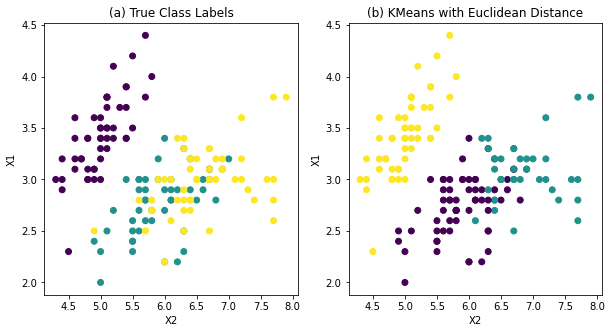

In [172]:
#compare the result

plt.figure(figsize = [10, 5])

plt.subplot(121)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c = y_iris)
plt.title("(a) True Class Labels")
plt.ylabel("X1")
plt.xlabel("X2")

plt.subplot(122)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c = res_iris[0])
plt.title("(b) KMeans with Euclidean Distance")
plt.ylabel("X1")
plt.xlabel("X2")

plt.show()

# Done... puh, that was a lot of work. And you did it! Congratulations!!! 